In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import seaborn as sns

In [2]:
data = pd.read_csv('TIL_NLP_train_dataset.csv')
data

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
...,...,...,...,...,...,...,...
7375,7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,0,1,1,0,0
7376,7376,w261297 w162756 w283853 w500021 w256905 w22079...,1,1,0,0,0
7377,7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,1,0,1,0,0
7378,7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,1,1,0,0,0


In [3]:
categories = list(data.columns.values)
categories = categories[2:]
print(categories)

['outwear', 'top', 'trousers', 'women dresses', 'women skirts']


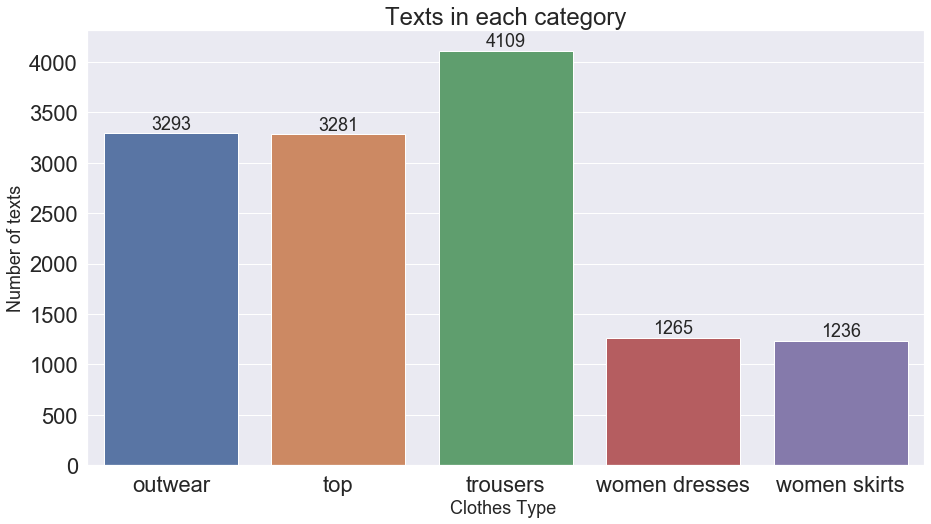

In [4]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, data.iloc[:,2:].sum().values)
plt.title("Texts in each category", fontsize=24)
plt.ylabel('Number of texts', fontsize=18)
plt.xlabel('Clothes Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

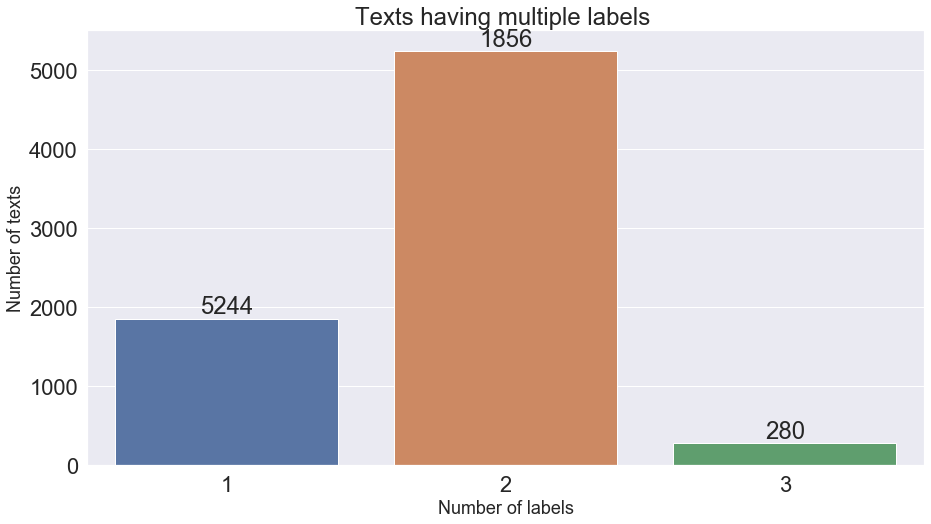

In [5]:
rowSums = data.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Texts having multiple labels ")
plt.ylabel('Number of texts', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.2, shuffle=True)

print(train.shape)
print(test.shape)

(5904, 7)
(1476, 7)


In [7]:
train_text = train['word_representation']
test_text = test['word_representation']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [9]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','word_representation'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','word_representation'], axis=1)

## One vs Rest Classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [11]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing outwear comments...**
Test accuracy is 0.9159891598915989


**Processing top comments...**
Test accuracy is 0.8658536585365854


**Processing trousers comments...**
Test accuracy is 0.8204607046070461


**Processing women dresses comments...**
Test accuracy is 0.9146341463414634


**Processing women skirts comments...**
Test accuracy is 0.9092140921409214


Wall time: 8.48 s


In [12]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(SVC(kernel='linear', C=2))),
                 ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing outwear comments...**
Test accuracy is 0.9532520325203252


**Processing top comments...**
Test accuracy is 0.9004065040650406


**Processing trousers comments...**
Test accuracy is 0.9390243902439024


**Processing women dresses comments...**
Test accuracy is 0.989159891598916


**Processing women skirts comments...**
Test accuracy is 0.9932249322493225


Wall time: 54 s


In [13]:
%%time
## best model so far
# Using pipeline for applying logistic regression and one vs rest classifier
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(SVC(kernel='sigmoid', C=2))),
                 ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing outwear comments...**
Test accuracy is 0.9498644986449865


**Processing top comments...**
Test accuracy is 0.8990514905149052


**Processing trousers comments...**
Test accuracy is 0.9383468834688347


**Processing women dresses comments...**
Test accuracy is 0.9898373983739838


**Processing women skirts comments...**
Test accuracy is 0.9932249322493225


Wall time: 46.8 s


In [14]:
%%time
## best model so far
# Using pipeline for applying logistic regression and one vs rest classifier
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(SVC(kernel='sigmoid', C=2, class_weight='balanced'))),
                 ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing outwear comments...**
Test accuracy is 0.9512195121951219


**Processing top comments...**
Test accuracy is 0.9031165311653117


**Processing trousers comments...**
Test accuracy is 0.9390243902439024


**Processing women dresses comments...**
Test accuracy is 0.986449864498645


**Processing women skirts comments...**
Test accuracy is 0.9905149051490515


Wall time: 50.4 s


In [15]:
## BEST
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(SVC(kernel='linear', C=2, class_weight='balanced'))),
                 ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing outwear comments...**
Test accuracy is 0.9539295392953929


**Processing top comments...**
Test accuracy is 0.9004065040650406


**Processing trousers comments...**
Test accuracy is 0.9451219512195121


**Processing women dresses comments...**
Test accuracy is 0.9884823848238482


**Processing women skirts comments...**
Test accuracy is 0.9905149051490515




In [41]:
print(prediction)

[0 0 0 ... 0 0 1]


IndexError: invalid index to scalar variable.

## Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm,                   # confusion matrix from sklearn.metrics.confusion_matrix
                        labels,                 # labels
                        title='Confusion matrix',
                        cmap=None,              # color gradient of values displayed
                        normalize=True):        # If False, plot the raw numbers, If True, plot the proportions

      import matplotlib.pyplot as plt
      import numpy as np
      import itertools

      accuracy = np.trace(cm) / np.sum(cm).astype('float')
      misclass = 1 - accuracy

      if cmap is None:
            cmap = plt.get_cmap('Blues')

      plt.figure(figsize=(8, 6))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if labels is not None:
            tick_marks = np.arange(len(labels))
            plt.xticks(tick_marks, labels, rotation=45)
            plt.yticks(tick_marks, labels)

      if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


      thresh = cm.max() / 1.5 if normalize else cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                  plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
                  plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()

cm = confusion_matrix(y_test, preds, labels)

plot_confusion_matrix(cm,
                        labels,
                        title='Confusion matrix',
                        cmap=None,
                        normalize=True)

NameError: name 'preds' is not defined

## Binary Relevance

In [ ]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(SVC(kernel='linear', C=2, class_weight='balanced'))

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

## Label Powerset

In [ ]:
# %%time

# from skmultilearn.problem_transform import LabelPowerset
# # initialize label powerset multi-label classifier
# classifier = LabelPowerset(LogisticRegression())

# # train
# classifier.fit(x_train, y_train)

# # predict
# predictions = classifier.predict(x_test)

# # accuracy
# print("Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")

## Adapted Algorithm

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
# %%time

# classifier_new = MLkNN(k=10)

# # Note that this classifier can throw up errors when handling sparse matrices.

# x_train = lil_matrix(x_train).toarray()
# y_train = lil_matrix(y_train).toarray()
# x_test = lil_matrix(x_test).toarray()

# # train
# classifier_new.fit(x_train, y_train)

# # predict
# predictions_new = classifier_new.predict(x_test)

# # accuracy
# print("Accuracy = ",accuracy_score(y_test,predictions_new))
# print("\n")

# Try

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [17]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing outwear
Test accuracy is 0.7588075880758808
... Processing top
Test accuracy is 0.790650406504065
... Processing trousers
Test accuracy is 0.771680216802168
... Processing women dresses
Test accuracy is 0.8529810298102981
... Processing women skirts
Test accuracy is 0.8299457994579946


In [20]:
from sklearn.svm import LinearSVC

In [25]:
SVC_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LinearSVC(C=2, class_weight='balanced', dual=False), n_jobs=1)),
            ])

In [26]:

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing outwear
Test accuracy is 0.9525745257452575
... Processing top
Test accuracy is 0.9715447154471545
... Processing trousers
Test accuracy is 0.962059620596206
... Processing women dresses
Test accuracy is 0.9979674796747967
... Processing women skirts
Test accuracy is 0.9959349593495935
